In [55]:
import networkx as nx
import seaborn as sns
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import random
import collections
from collections import defaultdict
import matplotlib.pyplot as plt 

In [2]:
#df = pd.read_csv('valuesAdjList.csv')
df = pd.read_csv('data/valuesMatrix.csv')
# df.columns
# df.head(10)
nameDict = df['name']
nameDict[0]
df = df.drop('name',axis=1)
# # range of lvls 1-5
#df[df['lvl'] < 5] -= 1
#df.rename(columns={'lvl': 'node'}, inplace=True)
newColBase = df['lvl'].to_numpy()
newCol = [[idx,x] for idx, x in enumerate(newColBase)]
newColInvert = [[x,idx] for idx, x in enumerate(newColBase)]

df['edges'] = newCol
df['invertedEdges'] = newColInvert
df['name'] = nameDict
df.head(10)

,lvl,edges,invertedEdges,name
0,1,"[0, 1]","[1, 0]",none
1,2,"[1, 2]","[2, 1]",little
2,3,"[2, 3]","[3, 2]",some
3,4,"[3, 4]","[4, 3]",more
4,5,"[4, 5]","[5, 4]",all
5,2,"[5, 2]","[2, 5]",ACCEPTANCE
6,3,"[6, 3]","[3, 6]",ACHIEVEMENT
7,4,"[7, 4]","[4, 7]",ADVENTURE
8,4,"[8, 4]","[4, 8]",ART
9,4,"[9, 4]","[4, 9]",ATTRACTIVENESS


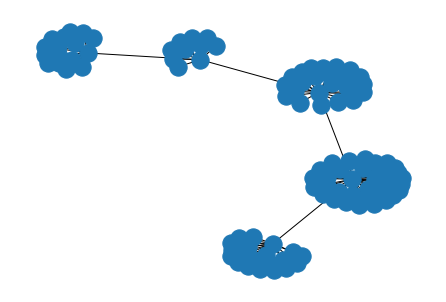

In [3]:
def bipartite(u,v,edges):
    bi = nx.Graph()
    bi.add_nodes_from(u, bipartite=0)
    bi.add_nodes_from(v, bipartite=1)
    bi.add_edges_from(edges)
    return bi


edges = df['edges'].to_list()
edges[4][1] = 4

invertedEdges = df['invertedEdges']
invertedEdges[4][1] = 4

for idx, value in enumerate(edges):
    
    if idx >= 4:
        edges[idx][0] += 1
        invertedEdges[idx][0] += 1
    
        
   
        
# # scale
u = [x for x in range(4)]
v = [x for x in range(4,len(edges)-1)]

# not a bipartite
biGraph = bipartite(u,v,edges)
nx.draw(biGraph)

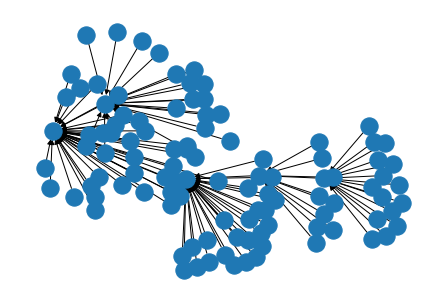

In [4]:
# create graphs
G1 = nx.MultiDiGraph()
G1.add_edges_from(edges)
#adjList = nx.adjacency_matrix(G1)
nx.draw(G1)

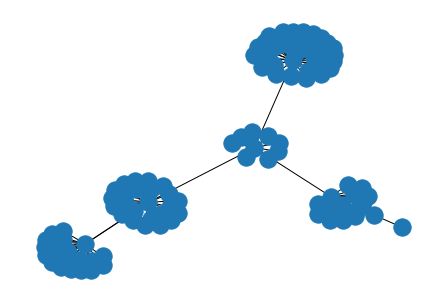

In [5]:
G2 = nx.MultiGraph()
G2.add_edges_from(invertedEdges)
#adjList2 = nx.adjacency_matrix(G1)
nx.draw(G2)

In [6]:
# connect duality of emotion. 
# e.g., hope/fear
# use 8 from Budhism
df['io'] = [[] for _ in range(len(df))]
df.head(10)

,lvl,edges,invertedEdges,name,io
0,1,"[0, 1]","[1, 0]",none,[]
1,2,"[1, 2]","[2, 1]",little,[]
2,3,"[2, 3]","[3, 2]",some,[]
3,4,"[3, 4]","[4, 3]",more,[]
4,5,"[5, 4]","[6, 4]",all,[]
5,2,"[6, 2]","[3, 5]",ACCEPTANCE,[]
6,3,"[7, 3]","[4, 6]",ACHIEVEMENT,[]
7,4,"[8, 4]","[5, 7]",ADVENTURE,[]
8,4,"[9, 4]","[5, 8]",ART,[]
9,4,"[10, 4]","[5, 9]",ATTRACTIVENESS,[]


In [7]:
# G2 = nx.DiGraph(adjDictValue)
# G2.remove_edges_from(nx.selfloop_edges(G2))
# nx.draw(G2, with_labels=False)
#adjDictValue[0]

In [8]:
eightEmotionSet = list((-x,x) for x in range(0,8))
eightEmotionSet
df['io'] = [ random.sample(eightEmotionSet, 1)[0] for _ in df.index ]
df.head(10)

,lvl,edges,invertedEdges,name,io
0,1,"[0, 1]","[1, 0]",none,"(-5, 5)"
1,2,"[1, 2]","[2, 1]",little,"(-5, 5)"
2,3,"[2, 3]","[3, 2]",some,"(-1, 1)"
3,4,"[3, 4]","[4, 3]",more,"(-1, 1)"
4,5,"[5, 4]","[6, 4]",all,"(-7, 7)"
5,2,"[6, 2]","[3, 5]",ACCEPTANCE,"(-2, 2)"
6,3,"[7, 3]","[4, 6]",ACHIEVEMENT,"(-4, 4)"
7,4,"[8, 4]","[5, 7]",ADVENTURE,"(-3, 3)"
8,4,"[9, 4]","[5, 8]",ART,"(-7, 7)"
9,4,"[10, 4]","[5, 9]",ATTRACTIVENESS,"(-5, 5)"


8


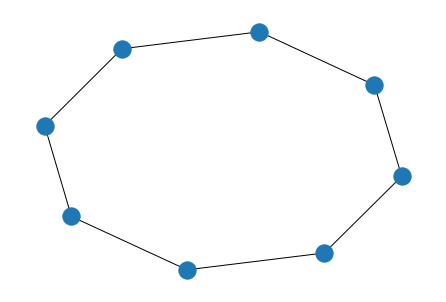

In [9]:
# eightEmotionSetConnected = [(-x,-x-1) for x in range(0,7) if x < 7]
# eightEmotionSetConnected.append((-7,0))
# print(len(eightEmotionSetConnected))

eightEmotionSetConnected = [(x,x+1) for x in range(0,7) if x < 7]
eightEmotionSetConnected.append((7,0))
print(len(eightEmotionSetConnected))



ioGraph = nx.Graph()
ioGraph.add_edges_from(eightEmotionSetConnected)
nx.draw(ioGraph)



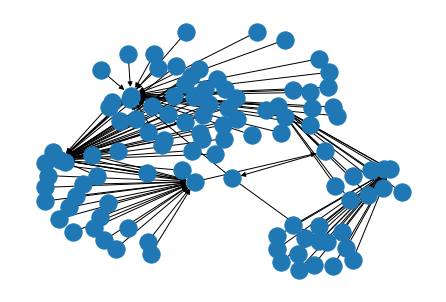

In [10]:
G1.add_edges_from(eightEmotionSetConnected)
nx.draw(G1)

In [11]:
eightEmotionSetConnected

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 0)]

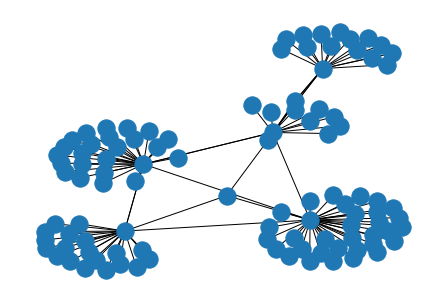

In [12]:
G2.add_edges_from(eightEmotionSetConnected)
nx.draw(G2)

In [64]:
G3 = nx.binomial_graph(1000,0.27)

L = G3.number_of_edges()
N = G3.number_of_nodes()
sigmaK = 2*L / N
print(sigmaK)
print(N)



def pnGraph(G):
    degrees = sorted([G.degree(n) for n in G.nodes()])
    degreesCount = collections.Counter(degrees)
    in_deg, in_cnt = zip(*degreesCount.items())
    # normalize against max element
    #n = max(in_cnt)
    # normalize against sum, e.g., range 0-1
    n = abs(sum(in_cnt))
    norm = [i/n for i in in_cnt]
    #print(norm)
    #norm = [(x-min(in_cnt))/ max(in_cnt)/min(in_cnt)]
    plt.title("Degree Distribution Plot")
    plt.xlabel('Degree')
    plt.ylabel('Norm % of Nodes')
    plt.plot(in_deg, norm,'o')
    plt.show()
    return norm
    
def linearScaling(G):
    degrees = sorted([G.degree(n) for n in G.nodes()])
    degreesCount = collections.Counter(degrees)
    in_deg, in_cnt = zip(*degreesCount.items())
    # normalize against max element
    
    scaled = [round((x-min(in_cnt))/ max(in_cnt)/min(in_cnt),2) for x in in_cnt]
    #print(norm)
    plt.title("Degree Linear Scale Plot")
    plt.xlabel('Degree')
    plt.ylabel('Norm % of Nodes')
    plt.plot(in_deg, scaled,'o')
    plt.show()
    return scaled

def zscore(G):
    # represents the number of standard deviations
    # away from the mean
    
    degrees = sorted([G.degree(n) for n in G.nodes()])
    degreesCount = collections.Counter(degrees)
    in_deg, in_cnt = zip(*degreesCount.items())
    sigma, mu = np.std(in_cnt), np.mean(in_cnt)
    zscores = [round((x-mu)/sigma,5) for x in in_cnt]
    #print(norm)
    plt.title("Degree Z-Score Plot")
    plt.xlabel('Degree')
    plt.ylabel('Norm % of Nodes')
    plt.plot(in_deg, zscores,'o')
    plt.show()
    return zscores,in_cnt


def logScaling(G):
    degrees = sorted([G.degree(n) for n in G.nodes()])
    degreesCount = collections.Counter(degrees)
    in_deg, in_cnt = zip(*degreesCount.items())
    # normalize against max element
    
    scaled = [np.log(x) for x in in_cnt]
    #print(norm)
    plt.title("Degree Log Scale Plot")
    plt.xlabel('Degree')
    plt.ylabel('Norm % of Nodes')
    plt.plot(in_deg, scaled,'o')
    plt.show()
    return scaled

    








270.472
1000


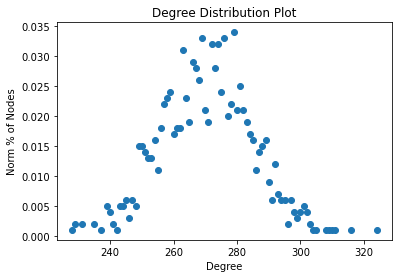

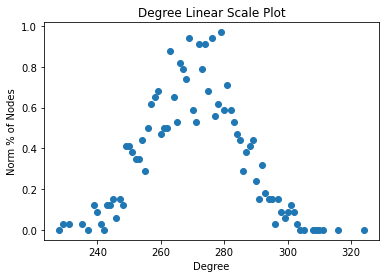

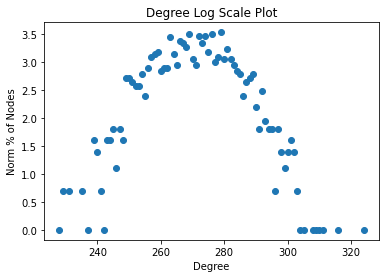

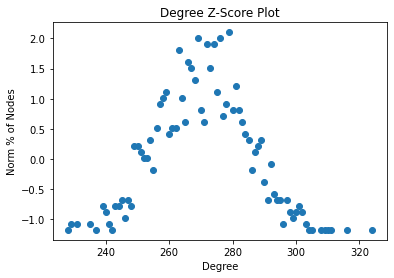

1.0000000000000007
27.149999999999995
160.47564490482577
0.00010999999999317112
[-1.17354, -1.07426, -1.07426, -1.07426, -1.17354, -0.77642, -0.8757, -1.07426, -1.17354, -0.77642, -0.77642, -0.67714, -0.97498, -0.67714, -0.77642, 0.21638, 0.21638, 0.1171, 0.01782, 0.01782, 0.31566, -0.18074, 0.51422, 0.91134, 1.01062, 1.1099, 0.41494, 0.51422, 0.51422, 1.80487, 1.01062, 0.6135, 1.60631, 1.50702, 1.30846, 2.00343, 0.81206, 0.6135, 1.90415, 1.50702, 1.90415, 1.1099, 2.00343, 0.71278, 0.91134, 2.10271, 0.81206, 1.20918, 0.81206, 0.6135, 0.41494, 0.31566, -0.18074, 0.1171, 0.21638, 0.31566, -0.3793, -0.67714, -0.08146, -0.57786, -0.67714, -0.67714, -1.07426, -0.67714, -0.8757, -0.97498, -0.8757, -0.77642, -0.8757, -1.07426, -1.17354, -1.17354, -1.17354, -1.17354, -1.17354, -1.17354, -1.17354, -1.17354]


In [71]:
a = pnGraph(G3)
b = linearScaling(G3)
c = logScaling(G3)
d,in_cnt = zscore(G3)
print(sum(a))
print(sum(b))
print(sum(c))
print(sum(d))



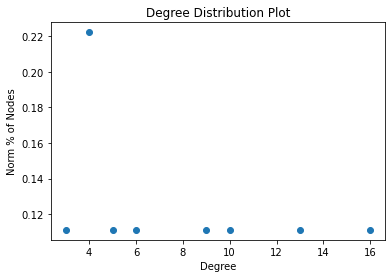

1.0000000000000002

In [79]:
x = pnGraph(G)
sum(x)


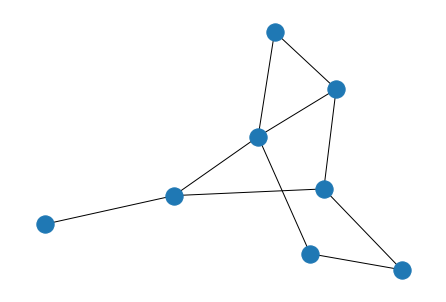

In [15]:
G4 = nx.sedgewick_maze_graph()
nx.draw(G4)

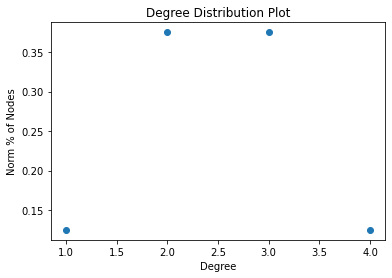

[0.125, 0.375, 0.375, 0.125]

In [85]:
pnGraph(G4)

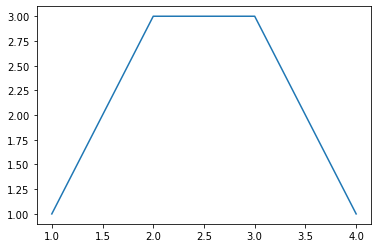

In [16]:
#pnGraph(G4)
degrees = sorted([G4.degree(n) for n in G4.nodes()])
degreesCount = collections.Counter(degrees)
degree,cnt = zip(*degreesCount.items())
plt.plot(degree,cnt)

In [17]:
adjMatrixG4 = nx.to_numpy_matrix(G4)
adjMatrixG4

matrix([[0., 0., 1., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 1., 0., 1., 1., 1.],
        [1., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [1., 1., 0., 0., 1., 0., 0., 0.]])

In [18]:
adjDict = G4.adjacency()
for node, edges in adjDict:
    print(node,':',edges)

0 : {2: {}, 7: {}, 5: {}}
1 : {7: {}}
2 : {0: {}, 6: {}}
3 : {4: {}, 5: {}}
4 : {3: {}, 5: {}, 7: {}, 6: {}}
5 : {0: {}, 3: {}, 4: {}}
6 : {2: {}, 4: {}}
7 : {0: {}, 1: {}, 4: {}}


# pnGraph(ioGraph)

In [19]:
#Clustering Coefficient
c = nx.clustering(G3)
print(c)

{0: 0.276062137376006, 1: 0.274570281124498, 2: 0.269580913514362, 3: 0.26882730187814935, 4: 0.27175280681378244, 5: 0.27447287186731545, 6: 0.2731037078863166, 7: 0.27020179169305947, 8: 0.2699868247694335, 9: 0.2722928317234367, 10: 0.2745525833175236, 11: 0.2666805184011635, 12: 0.2697553642203089, 13: 0.2730599818629356, 14: 0.27372872225813405, 15: 0.27069828722002637, 16: 0.27194840653391705, 17: 0.27180550754695243, 18: 0.27163338453661034, 19: 0.2712780577187357, 20: 0.2729868370112273, 21: 0.26932812069267975, 22: 0.2684353036064063, 23: 0.2731017398317779, 24: 0.27043010752688174, 25: 0.2729096989966555, 26: 0.2698323574235983, 27: 0.27166771145318197, 28: 0.26738544474393533, 29: 0.2723130061242853, 30: 0.2767666497203864, 31: 0.26961391099322135, 32: 0.26903585657370516, 33: 0.27151767151767153, 34: 0.2715323417502594, 35: 0.2689991539342059, 36: 0.2724494010739364, 37: 0.27108330266225, 38: 0.2723798419484389, 39: 0.26825066825066823, 40: 0.2723740846330147, 41: 0.2701388

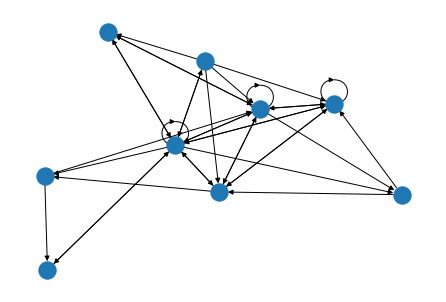

In [20]:
# passing in normally distributed training samples
# S = [ (0,value 0), (1,value1), (0.5, value1), ... Nth]
# S`= [value 0`, value 1`]

z = np.random.normal(loc=0, scale=2, size=(100)).tolist()
y = np.random.normal(loc=0, scale=2, size=(100)).tolist()

zy = [(int(i),int(j) )for i,j in zip(z,y)]
# sns.distplot(z)
# sns.distplot(y)
# sns.distplot(zy)
G = nx.DiGraph()
G.add_edges_from(zy)
nx.draw(G)

def feel_baseLayer(data:list, layer:object) -> object:
    # python >= 3.9 = layer | data
    # newCol = df['lvl'].to_numpy()
    # newCol = [[x] for x in newCol]
    # df['lvl'] = newCol
    
    updated_layer = {**layer, **data} 
    return updated_layer